In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

In [22]:
gen_array = []
with open("gen_array_mixed.csv", "r") as genfile: 
    reader = csv.reader(genfile)
    for row in reader:
        gen_array.append(''.join(row))

gen_array

['SLYSMVFRFYYGXPR',
 'EWTSLAXFALSYWYP',
 'XXIPLMFXVLFTTQA',
 'AWCGLVXFFNLTIQW',
 'SHHDGALPCYDFXLR',
 'VQSMVSFTLXLKTPT',
 'XXIPLMFXVLFTTQA',
 'LASXDGESPCYWQPA',
 'XXIPLMFXVLFTTQA',
 'SHHDGALPCYDFXLR']

In [23]:
# pop_array = []
# with open("pop_array.csv", "r") as popfile: 
#     reader = csv.reader(popfile)
#     for row in reader:
#         pop_array.append(''.join(row))

# pop_array

In [24]:
amino_acids = {
    'A': 0, 'R': 1, 'N': 2, 'D': 3, 'C': 4, 'Q': 5, 'E': 6, 'G': 7, 'H': 8, 'I': 9,
    'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14, 'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19
}

blosum50_matrix = [
    [ 5, -2, -1, -2, -1, -1, -1,  0, -2, -1, -2, -1, -1, -3, -1,  1,  0, -3, -2,  0],
    [-2,  7, -1, -2, -4,  1,  0, -3,  0, -4, -3,  3, -2, -3, -3, -1, -1, -3, -1, -3],
    [-1, -1,  7,  2, -2,  0,  0,  0,  1, -3, -4,  0, -2, -4, -2,  1,  0, -4, -2, -3],
    [-2, -2,  2,  8, -4,  0,  2, -1, -1, -4, -4, -1, -4, -5, -1,  0, -1, -5, -3, -4],
    [-1, -4, -2, -4, 13, -3, -3, -3, -3, -2, -2, -3, -2, -2, -4, -1, -1, -5, -3, -1],
    [-1,  1,  0,  0, -3,  7,  2, -2,  1, -3, -2,  2,  0, -4, -1,  0, -1, -1, -1, -3],
    [-1,  0,  0,  2, -3,  2,  6, -3,  0, -4, -3,  1, -2, -3, -1,  -1, -1, -3, -2, -3],
    [ 0, -3,  0, -1, -3, -2, -3,  8, -2, -4, -4, -2, -3, -4, -2,  0, -2, -3, -3, -4],
    [-2,  0,  1, -1, -3,  1,  0, -2, 10, -4, -3,  0, -1, -1, -2, -1, -2, -3,  2, -4],
    [-1, -4, -3, -4, -2, -3, -4, -4, -4,  5,  2, -3,  2,  0, -3, -3, -1, -3, -1,  4],
    [-2, -3, -4, -4, -2, -2, -3, -4, -3,  2,  5, -3,  3,  1, -4, -3, -1, -2, -1,  1],
    [-1,  3,  0, -1, -3,  2,  1, -2,  0, -3, -3,  6, -2, -4, -1,  0, -1, -3, -2, -3],
    [-1, -2, -2, -4, -2,  0, -2, -3, -1,  2,  3, -2,  7,  0, -3, -2, -1, -1,  0,  1],
    [-3, -3, -4, -5, -2, -4, -3, -4, -1,  0,  1, -4,  0,  8, -4, -3, -2,  1,  4, -1],
    [-1, -3, -2, -1, -4, -1, -1, -2, -2, -3, -4, -1, -3, -4, 10, -1, -1, -4, -3, -3],
    [ 1, -1,  1,  0, -1,  0,  -1,  0, -1, -3, -3,  0, -2, -3, -1,  5,  2, -4, -2, -2],
    [ 0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1,  2,  5, -3, -2,  0],
    [-3, -3, -4, -5, -5, -1, -3, -3, -3, -3, -2, -3, -1,  1, -4, -4, -3, 15,  2, -3],
    [-2, -1, -2, -3, -3, -1, -2, -3,  2, -1, -1, -2, 0,  4, -3, -2, -2,  2,  8, -1],
    [ 0, -3, -3, -4, -1, -3, -3, -4, -4,  4,  1, -3,  1, -1, -3, -2,  0, -3, -1,  5]
]

In [25]:
class align:
    
    def __init__(self, str1, str2):
        self.str1 = str1
        self.str2 = str2
        self.gapP = -8
        self.score = [[0 for x in range(0,len(self.str1)+1)] for y in range(0,len(self.str2)+1)]
        self.direction = [[0 for x in range(0,len(self.str1)+1)] for y in range(0,len(self.str2)+1)]

    def my_print(self,array):
        for r in array:
            for c in r:
                print(f"{c:4}",end = ' ')
            print()

    def fill_matrix(self):
        for c in range(0,len(self.str1)+1):
            self.score[0][c] = c*self.gapP
            self.direction[0][c] = '-'
        for r in range(0,len(self.str2)+1):
            self.score[r][0] = r*self.gapP
            self.direction[r][0] = '|'
        self.direction[0][0] = 'X'
        # self.my_print(self.score)
        # self.my_print(self.direction)

    def SW(self):
        for c in range(1,len(self.str1)+1):
            for r in range(1,len(self.str2)+1):
                scoreD = self.score[r-1][c-1] + blosum50_matrix[amino_acids[self.str2[r-1]]][amino_acids[self.str1[c-1]]]
                scoreV = self.score[r-1][c] + self.gapP 
                scoreH = self.score[r][c-1] + self.gapP
                # set to initial index in columns thats always 0
                scoreZ = 0
                self.score[r][c] = max(scoreD,scoreV,scoreH,scoreZ)
                if(self.score[r][c] == scoreD):
                    self.direction[r][c] = "\\"
                if(self.score[r][c] == scoreH):
                    self.direction[r][c] = "-"
                if(self.score[r][c] == scoreV):
                    self.direction[r][c] = "|"

        self.my_print(self.score)
        self.my_print(self.direction)

    def alignment(self):
        align1 = ""
        align2 = ""

        target = max(map(max, self.score))
        print("Largest value in the matrix is: ", target)
        s = [start for start in self.score if target in start][0]

        print ('The index is (%d,%d)'%(self.score.index(s), s.index(target)))
        
        row = self.score.index(s)
        col = s.index(target)
        
        while(row > 0 or col > 0):
            if(self.direction[row][col] == "\\"):
                align1 += self.str1[col-1]
                align2 += self.str2[row-1]
                row -= 1
                col -= 1
            if(self.direction[row][col] == "-"):
                align1 += self.str1[col-1]
                align2 += "-"
                col -= 1
            if(self.direction[row][col] == "|"):
                align1 += "-"
                align2 += self.str2[row-1]
                row -= 1
            if(self.direction[row][col] == 0):
                break
        align1 = align1[::-1]
        align2 = align2[::-1]

        print(align1)
        print(align2)
        return align1, align2, target

In [26]:
local = align(gen_array[3],gen_array[4])
local.fill_matrix()
local.SW()

print(gen_array[3])
print(gen_array[4])

str1, str2, target = local.alignment()

print("Score: ", target)



KeyError: 'X'

In [ ]:
gen_array

['TTSSLHPRNPCGFPYHCGLGIAMALSGVKIPPHDGRKLK',
 'AGTWRMSGSGLRPPSKMLCIAMPLSVVINGSSTNEGY',
 'TTSSLHPRNPCGFPYHCGLGIAMALSGVKIPPHDGRKLK',
 'YGSLGIFGSEVSPVSMGSYIDLDLYLAIMCLMSYGDT',
 'VTITRRERSPPAASLMVCNDMPHTAGAVRVCKRPSYFKYGF',
 'PENHKYPGPVHSLAYIGGPLPMQLSVSIGEMSEWETF',
 'YGSLGIFGSEVSPVSMGSYIDLDLYLAIMCLMSYGDT',
 'AGTWRMSGSGLRPPSKMLCIAMPLSVVINGSSTNEGY',
 'TTSSLHPRNPCGFPYHCGLGIAMALSGVKIPPHDGRKLK',
 'YGSLGIFGSEVSPVSMGSYIDLDLYLAIMCLMSYGDT']

In [ ]:
print(gen_array[0][0:round(len(gen_array[0])* .25)])

TTSSLHPRNP


In [ ]:
hydrophilic = ['R', 'N', 'D', 'Q', 'E', 'H', 'K', 'S', 'T']

hydrophobic = ['A', 'I', 'L', 'M', 'F', 'W', 'Y', 'V']

neutral = ['G', 'C', 'P']

In [ ]:
fitness = 0
for i in range(0, round(len(gen_array[0])* .25)):
    if gen_array[0][i] in hydrophilic:
        fitness += 1

print("Fitness: ", fitness)
print("Length: ", round(len(gen_array[0])* .25))

Fitness:  7
Length:  10


In [ ]:
pairwise_score = {}

for i in range(0, len(gen_array)):
    for j in range(i+1, len(gen_array)):
        local = align(gen_array[i],gen_array[j])
        local.fill_matrix()
        local.SW()
        str1, str2, target = local.alignment()
        pairwise_score[(i,j)] = target


   0   -8  -16  -24  -32  -40  -48  -56  -64  -72  -80  -88  -96 -104 -112 -120 -128 -136 -144 -152 -160 -168 -176 -184 -192 -200 -208 -216 -224 -232 -240 -248 -256 -264 -272 -280 -288 -296 -304 -312 
  -8    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 -16    0    0    0    0    0    0    0    0    0    0    0    8    0    0    0    0    0    8    0    8    0    0    0    0    0    0    8    0    0    0    0    0    0    0    8    0    0    0    0 
 -24    0    5    2    2    0    0    0    0    0    0    0    0    6    0    0    0    0    0    7    0    7    0    0    0    0    2    0    8    0    0    0    0    0    0    0    7    0    0    0 
 -32    0    0    1    0    0    0    0    0    0    0    0    0    1    2    2    0    0    0    0    4    0    4    0    0    0    0    0    0    5    0    0    0    0    0    0    0    4    0  

In [ ]:
pairwise_score

{(0, 1): 33,
 (0, 2): 286,
 (0, 3): 23,
 (0, 4): 23,
 (0, 5): 24,
 (0, 6): 23,
 (0, 7): 33,
 (0, 8): 286,
 (0, 9): 23,
 (1, 2): 33,
 (1, 3): 29,
 (1, 4): 39,
 (1, 5): 28,
 (1, 6): 29,
 (1, 7): 252,
 (1, 8): 33,
 (1, 9): 29,
 (2, 3): 23,
 (2, 4): 23,
 (2, 5): 24,
 (2, 6): 23,
 (2, 7): 33,
 (2, 8): 286,
 (2, 9): 23,
 (3, 4): 19,
 (3, 5): 24,
 (3, 6): 244,
 (3, 7): 29,
 (3, 8): 23,
 (3, 9): 244,
 (4, 5): 26,
 (4, 6): 19,
 (4, 7): 39,
 (4, 8): 23,
 (4, 9): 19,
 (5, 6): 24,
 (5, 7): 28,
 (5, 8): 24,
 (5, 9): 24,
 (6, 7): 29,
 (6, 8): 23,
 (6, 9): 244,
 (7, 8): 33,
 (7, 9): 29,
 (8, 9): 23}

In [ ]:
sorted_pairs = sorted(pairwise_score.items(), key=lambda x:-x[1])
sorted_pairs

[((0, 2), 286),
 ((0, 8), 286),
 ((2, 8), 286),
 ((1, 7), 252),
 ((3, 6), 244),
 ((3, 9), 244),
 ((6, 9), 244),
 ((1, 4), 39),
 ((4, 7), 39),
 ((0, 1), 33),
 ((0, 7), 33),
 ((1, 2), 33),
 ((1, 8), 33),
 ((2, 7), 33),
 ((7, 8), 33),
 ((1, 3), 29),
 ((1, 6), 29),
 ((1, 9), 29),
 ((3, 7), 29),
 ((6, 7), 29),
 ((7, 9), 29),
 ((1, 5), 28),
 ((5, 7), 28),
 ((4, 5), 26),
 ((0, 5), 24),
 ((2, 5), 24),
 ((3, 5), 24),
 ((5, 6), 24),
 ((5, 8), 24),
 ((5, 9), 24),
 ((0, 3), 23),
 ((0, 4), 23),
 ((0, 6), 23),
 ((0, 9), 23),
 ((2, 3), 23),
 ((2, 4), 23),
 ((2, 6), 23),
 ((2, 9), 23),
 ((3, 8), 23),
 ((4, 8), 23),
 ((6, 8), 23),
 ((8, 9), 23),
 ((3, 4), 19),
 ((4, 6), 19),
 ((4, 9), 19)]

In [ ]:
matrix = [[0] * (i + 1) for i in range(len(gen_array))]

for (i, j), score in pairwise_score.items():
    distance = 1 - (score / max(pairwise_score.values()))
    if i < j:
        matrix[j][i] = distance

In [ ]:
matrix

[[0],
 [0.8846153846153846, 0],
 [0.0, 0.8846153846153846, 0],
 [0.9195804195804196, 0.8986013986013986, 0.9195804195804196, 0],
 [0.9195804195804196,
  0.8636363636363636,
  0.9195804195804196,
  0.9335664335664335,
  0],
 [0.916083916083916,
  0.9020979020979021,
  0.916083916083916,
  0.916083916083916,
  0.9090909090909091,
  0],
 [0.9195804195804196,
  0.8986013986013986,
  0.9195804195804196,
  0.14685314685314688,
  0.9335664335664335,
  0.916083916083916,
  0],
 [0.8846153846153846,
  0.11888111888111885,
  0.8846153846153846,
  0.8986013986013986,
  0.8636363636363636,
  0.9020979020979021,
  0.8986013986013986,
  0],
 [0.0,
  0.8846153846153846,
  0.0,
  0.9195804195804196,
  0.9195804195804196,
  0.916083916083916,
  0.9195804195804196,
  0.8846153846153846,
  0],
 [0.9195804195804196,
  0.8986013986013986,
  0.9195804195804196,
  0.14685314685314688,
  0.9335664335664335,
  0.916083916083916,
  0.14685314685314688,
  0.8986013986013986,
  0.9195804195804196,
  0]]

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceMatrix
from Bio import Phylo

labels = [f"Gen_{(i+1)*10}" for i in range(len(gen_array))]
labels

['Gen_10',
 'Gen_20',
 'Gen_30',
 'Gen_40',
 'Gen_50',
 'Gen_60',
 'Gen_70',
 'Gen_80',
 'Gen_90',
 'Gen_100']

In [ ]:
distance_matrix = DistanceMatrix(labels, matrix)

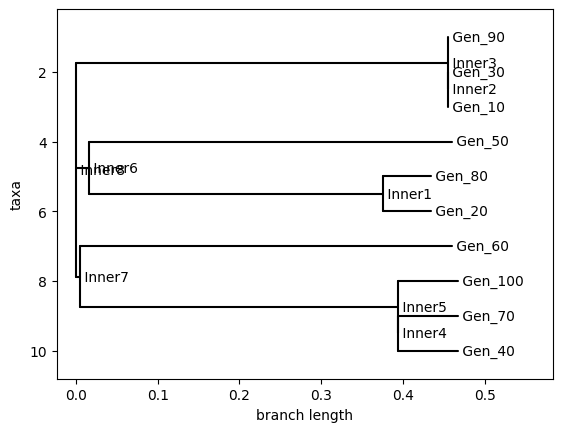

<Figure size 900x1000 with 0 Axes>

In [ ]:
constructor = DistanceTreeConstructor()
tree = constructor.nj(distance_matrix)
Phylo.draw(tree)
plt.figure(figsize=(9,10))
plt.show()

In [ ]:
gen_array

['TTSSLHPRNPCGFPYHCGLGIAMALSGVKIPPHDGRKLK',
 'AGTWRMSGSGLRPPSKMLCIAMPLSVVINGSSTNEGY',
 'TTSSLHPRNPCGFPYHCGLGIAMALSGVKIPPHDGRKLK',
 'YGSLGIFGSEVSPVSMGSYIDLDLYLAIMCLMSYGDT',
 'VTITRRERSPPAASLMVCNDMPHTAGAVRVCKRPSYFKYGF',
 'PENHKYPGPVHSLAYIGGPLPMQLSVSIGEMSEWETF',
 'YGSLGIFGSEVSPVSMGSYIDLDLYLAIMCLMSYGDT',
 'AGTWRMSGSGLRPPSKMLCIAMPLSVVINGSSTNEGY',
 'TTSSLHPRNPCGFPYHCGLGIAMALSGVKIPPHDGRKLK',
 'YGSLGIFGSEVSPVSMGSYIDLDLYLAIMCLMSYGDT']

In [ ]:
sorted_pairs[0][0][1]

2